In [1]:
!pip install pandas matplotlib seaborn


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [10]:
df = pd.read_csv('../data/Volume 1 Crime .csv')


df.head(10)

,IPC Crimes Over the years 1981 -2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,S.No,Year,Crime Incidence,Crime Rate,Charge-sheeting Rate,NaN,NaN,NaN
1,1,1981,1385757,200.8,61.3,NaN,NaN,NaN
2,2,1982,1352904,192,65.3,NaN,NaN,NaN
3,3,1983,1349866,187.4,67.3,NaN,NaN,NaN
4,4,1984,1358660,184.7,67.9,NaN,NaN,NaN
5,5,1985,1384731,184.4,70.2,NaN,NaN,NaN
6,6,1986,1405835,183.5,71.1,NaN,NaN,NaN
7,7,1987,1406992,180.1,72.4,NaN,NaN,NaN
8,8,1988,1440356,180.8,70.7,NaN,NaN,NaN
9,9,1989,1529844,188.5,72.3,NaN,NaN,NaN


In [22]:
df=df.iloc[1:43, 0:4].copy()

df.columns=["S.No", "Year", "Crime Incidence", "Crime Rate"]

df.reset_index(drop=True, inplace=True)

df["Year"] = pd.to_numeric(df_table1["Year"],errors="coerce")
df["Crime Incidence"] = pd.to_numeric(df_table1["Crime Incidence"],errors="coerce")
df["Crime Rate"] = pd.to_numeric(df_table1["Crime Rate"], errors="coerce")

df.head()

,S.No,Year,Crime Incidence,Crime Rate
0,1,1981,1385757,200.8
1,2,1982,1352904,192.0
2,3,1983,1349866,187.4
3,4,1984,1358660,184.7
4,5,1985,1384731,184.4


In [24]:
df_table1.to_csv('../outputs/ipc_crime_trends_cleaned.csv', index=False)


In [25]:
print(df.columns)

Index(['S.No', 'Year', 'Crime Incidence', 'Crime Rate'], dtype='object')


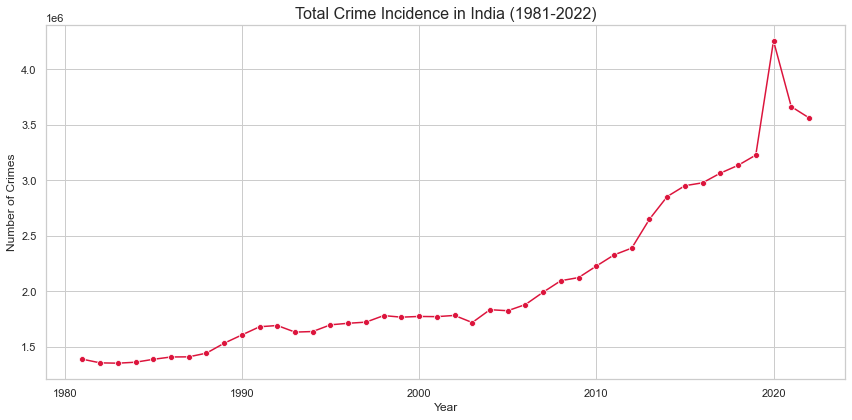

In [26]:
# Strip leading/trailing spaces in column names


plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Crime Incidence", data=df, marker='o', color='crimson')
plt.title("Total Crime Incidence in India (1981-2022)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

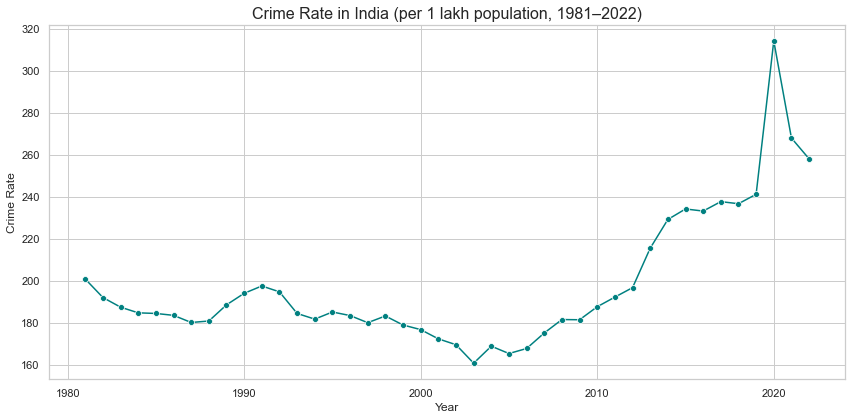

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Crime Rate", data=df, marker='o', color='teal')
plt.title("Crime Rate in India (per 1 lakh population, 1981–2022)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
max_year = df.loc[df["Crime Incidence"].idxmax()]
min_year = df.loc[df["Crime Incidence"].idxmin()]

print("📈 Highest Crimes Recorded:")
print(max_year)

print("\n📉 Lowest Crimes Recorded:")
print(min_year)


📈 Highest Crimes Recorded:
S.No                    40
Year                  2020
Crime Incidence    4254356
Crime Rate           314.3
Name: 39, dtype: object

📉 Lowest Crimes Recorded:
S.No                     3
Year                  1983
Crime Incidence    1349866
Crime Rate           187.4
Name: 2, dtype: object


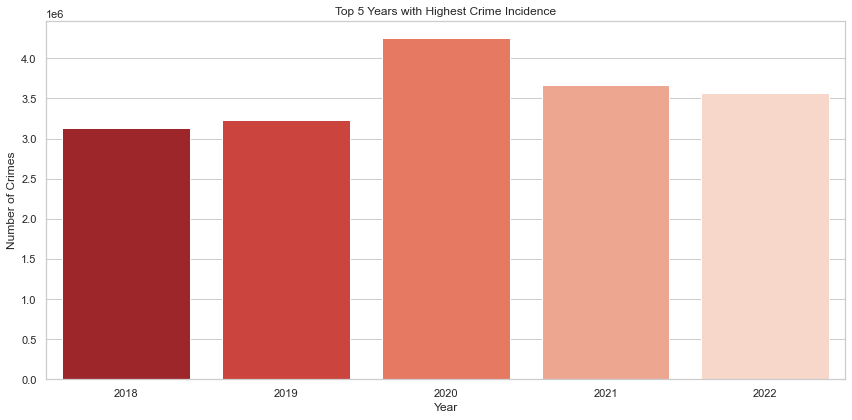

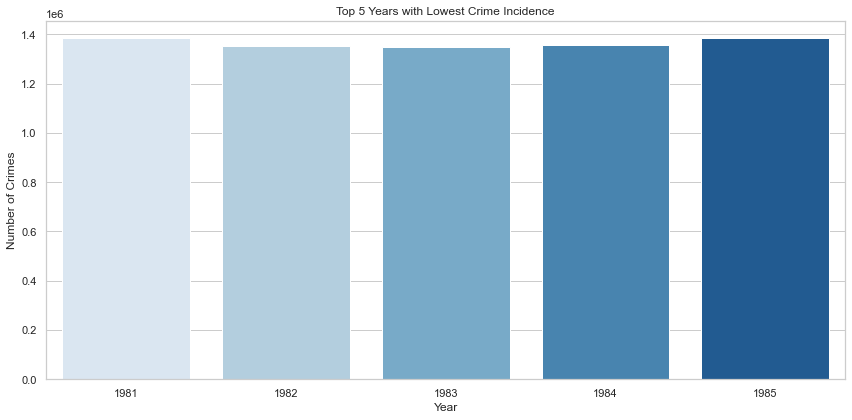

In [29]:
# Top 5 years by crime incidence
top5 = df.sort_values(by="Crime Incidence", ascending=False).head(5)

# Bottom 5 years
bottom5 = df.sort_values(by="Crime Incidence", ascending=True).head(5)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="Crime Incidence", data=top5, palette="Reds_r")
plt.title("Top 5 Years with Highest Crime Incidence")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="Crime Incidence", data=bottom5, palette="Blues")
plt.title("Top 5 Years with Lowest Crime Incidence")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()


In [30]:
plt.savefig('../outputs/crime_trend.png')


<Figure size 432x288 with 0 Axes>

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [32]:
# Feature and target
X = df[['Year']]  # input feature
y = df['Crime Incidence']  # target


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.6533138012214448
MSE: 228386598867.48334


In [36]:
future_years = pd.DataFrame({'Year': [2023, 2024]})
future_predictions = model.predict(future_years)

for year, pred in zip(future_years['Year'], future_predictions):
    print(f"Predicted Crime Incidence in {year}: {int(pred):,}")


Predicted Crime Incidence in 2023: 3,202,101
Predicted Crime Incidence in 2024: 3,253,782


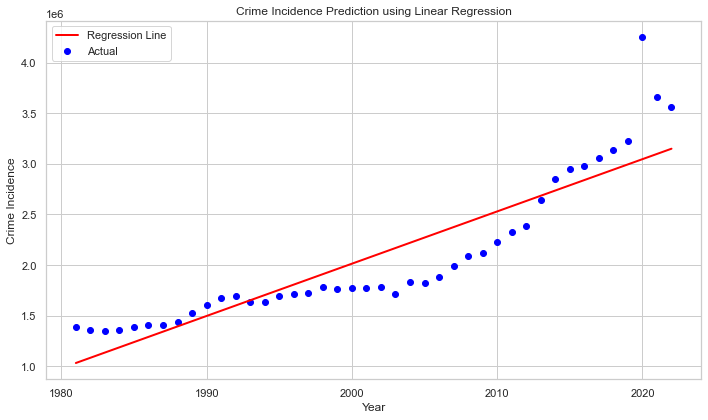

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Convert X and y to NumPy arrays
X_np = X['Year'].values.reshape(-1, 1)
y_np = y.values

# Predict with the trained model
y_pred = model.predict(X_np)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_np, y_np, label='Actual', color='blue', marker='o')
plt.plot(X_np, y_pred, color='red', label='Regression Line', linewidth=2)

plt.title("Crime Incidence Prediction using Linear Regression")
plt.xlabel("Year")
plt.ylabel("Crime Incidence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
!pip install Streamlit